### Python practice for probability and statistics book

### Chp8 ANOVA and regression

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from scipy import stats

In [59]:
# eg 8.1.1 chicken receipes, balanced design
data=pd.DataFrame([[1073, 1009, 1060,1001,1002,1012,1009,1028],[1107,1092,990,1109,1090,1074,1122,1001],[1093,1029,1080,1021,1022,1032,1029,1048]], index=["A1","A2","A3"])

In [60]:
# transpose index and columns
data=data.transpose()

In [61]:
data

,A1,A2,A3
0,1073,1107,1093
1,1009,1092,1029
2,1060,990,1080
3,1001,1109,1021
4,1002,1090,1022
5,1012,1074,1032
6,1009,1122,1029
7,1028,1001,1048


#### 1. Anova analysis

#### Part 1: Test whether the three groups have the same mean, ANOVA analysis

The ANOVA model is (1) yij=mu+ai+eij, (2)sum(i,n)ai=0 (3)eij is normal distribution with mean 0 and variance sigma2

The null hypothesis is that each receipe has the same effect

H0: mu1=mu2=mu3

H1: not all mu the same

The test statistics is F=MSA/MSE~F(fA,fe)

The rejection region is W={F>=F(1-a)(fa,fe)}


In [62]:
n=data.size
m1=m2=m3=data.shape[0]
mu=(data["A1"].mean()+data["A2"].mean()+data["A3"].mean())/3
(mu1,mu2, mu3)=(data["A1"].mean(), data["A2"].mean(), data["A3"].mean())

In [63]:
# Total sum of squares
SST=np.sum(np.square((data-mu)["A1"]).sum()+np.square((data-mu)["A2"]).sum()+np.square((data-mu)["A3"]).sum())
ft=n-1

In [64]:
# Regression sum of squares
r=data.shape[1]
fa=r-1
SSA=m1*np.square(mu1-mu)+m2*np.square(mu2-mu)+m3*np.square(mu3-mu)
MSA=SSA/fa

In [65]:
# Error sum of squares
fe=n-r
SSE=SST-SSA
MSE=SSE/fe

In [66]:
# F statistics
print(SST, SSA, SSE, MSA, MSE)
F=MSA/MSE
print(F)
p=stats.f.sf(F, fa, fe)
print(p)

37875.9583333 9660.08333333 28215.875 4830.04166667 1343.61309524
3.59481586164
0.0454322109199


In [67]:
# ppf(q, dfn, dfd, loc=0, scale=1) percentile, inverse of cdf
if F>stats.f.ppf(0.95,fa,fe):
    print("The F-statistic is: ", F, " > ",stats.f.ppf(0.95,fa,fe), "reject the null hypothesis that the mean of each group is the same" )
else:
    print("The F-statistic is: ",F, " < ",stats.f.ppf(0.95,fa,fe), "could not reject the null hypothesis the three groups are equal" )

The F-statistic is:  3.59481586164  >  3.46680011154 reject the null hypothesis that the mean of each group is the same


#### Part 2 Parameter estimate
The group effect ai=mui-mu

The unbiased estimate of sigma2 is MSE

In [68]:
a1,a2,a3=mu1-mu,mu2-mu,mu3-mu
sigma2=MSE
print("The estimate of sigma2 is: ", sigma2)

The estimate of sigma2 is:  1343.61309524


#### Part 3 Confidence interval for three group mean yi.
sqrt(m)(yi.-mui)/sqrt(Se/fe)~t(fe)

So the 1-a confidence interval is

[yi.+-sigma>t(fe)/sqrt(m)]

In [69]:
# confidence interval for mu1 is
(mu1L,mu1U)=(mu1-np.sqrt(MSE)*stats.t.ppf(0.975, fe)/np.sqrt(m1),mu1+np.sqrt(MSE)*stats.t.ppf(0.975, fe)/np.sqrt(m1))
(mu2L,mu2U)=(mu2-np.sqrt(MSE)*stats.t.ppf(0.975, fe)/np.sqrt(m2),mu2+np.sqrt(MSE)*stats.t.ppf(0.975, fe)/np.sqrt(m2))
(mu3L,mu3U)=(mu3-np.sqrt(MSE)*stats.t.ppf(0.975, fe)/np.sqrt(m3),mu3+np.sqrt(MSE)*stats.t.ppf(0.975, fe)/np.sqrt(m3))

In [70]:
print("Point estmator is", mu1, ", 95% CI for mu1 is: ", (mu1L, mu1U))
print("Point estmate is", mu2, ", 95% CI for mu2 is: ", (mu2L, mu2U))
print("Point estimate is", mu3,  ", 95% CI for mu3 is: ", (mu3L, mu3U))

Point estmator is 1024.25 , 95% CI for mu1 is:  (997.29900394339666, 1051.2009960566033)
Point estmate is 1073.125 , 95% CI for mu2 is:  (1046.1740039433967, 1100.0759960566033)
Point estimate is 1044.25 , 95% CI for mu3 is:  (1017.2990039433967, 1071.2009960566033)


#### Part 4 Multiple comparison

In [72]:
# 95% CI for mu1-mu2
print(mu1-mu2-stats.t.ppf(0.975, fe)*np.sqrt(MSE)*np.sqrt((1/m1+1/m2)), mu1-mu2+stats.t.ppf(0.975, fe)*np.sqrt(MSE)*np.sqrt((1/m1+1/m2)))

-86.9894641427 -10.7605358573


In [73]:
# 95% CI for mu1-mu3
print(mu1-mu3-stats.t.ppf(0.975, fe)*np.sqrt(MSE)*np.sqrt((1/m1+1/m3)), mu1-mu3+stats.t.ppf(0.975, fe)*np.sqrt(MSE)*np.sqrt((1/m1+1/m3)))

-58.1144641427 18.1144641427


#### 8.1.4 Unbalanced desgin, each level has different number of observations

In [4]:
a1=np.array([12,18])
a2=np.array([14,12,13])
a3=np.array([19,17,21])
a4=np.array([24,30])

In [8]:
m1,m2,m3,m4=a1.size, a2.size,a3.size,a4.size
n=m1+m2+m3+m4
r=4

In [40]:
mu=np.sum([a1.sum(), a2.sum(), a3.sum(), a4.sum()])/n
mu1, mu2,mu3,mu4=a1.mean(), a2.mean(), a3.mean(), a4.mean()

In [41]:
SST=np.sum([(np.square(a1-mu)).sum(), (np.square(a2-mu)).sum(), (np.square(a3-mu)).sum(), (np.square(a4-mu)).sum()])
ft=n-1

In [42]:
SSA=np.sum([m1*(mu1-mu)**2, m2*(mu2-mu)**2, m3*(mu3-mu)**2, m4*(mu4-mu)**2])
fa=r-1
MSA=SSA/fa

In [47]:
SSE=SST-SSA
fe=n-r
MSE=SSE/fe

In [48]:
F=MSA/MSE

In [49]:
print("SST: ", SST)
print("SSA: ", SSA, "fa: ", fa)
print("SSE: ", SSE, "fe: ", fe)

SST:  304.0
SSA:  258.0 fa:  3
SSE:  46.0 fe:  6


In [51]:
if F>stats.f.sf(0.99,fa,fe):
    print("F: ", F, " > ", stats.f.ppf(0.99,fa,fe), " : reject" )
else:
    print("F: ", F, " < ", stats.f.ppf(0.99,fa,fe), " : could not reject" )

F:  11.2173913043  >  9.77953824092  : reject


##### Parameter estimate

In [52]:
print("mu1:", mu1)
print("mu2: ", mu2)
print("mu3: ", mu3)
print("mu4: ", mu4)

mu1: 15.0
mu2:  13.0
mu3:  19.0
mu4:  27.0


In [53]:
#the unbiased estimate of mu is MSE
print("MSE: ", MSE)

MSE:  7.66666666667


In [57]:
# 95% CI for mu3 is
print(mu3-stats.t.ppf(0.975,fe)*np.sqrt(MSE)/np.sqrt(m3), mu3+stats.t.ppf(0.975,fe)*np.sqrt(MSE)/np.sqrt(m3))

15.0883410069 22.9116589931


In [58]:
# 95% CI for mu4
print(mu4-stats.t.ppf(0.975,fe)*np.sqrt(MSE)/np.sqrt(m4), mu4+stats.t.ppf(0.975,fe)*np.sqrt(MSE)/np.sqrt(m4))

22.2092157096 31.7907842904


### 8.3 Equality of variance for more than three groups

The null hypothesis is H0: sigma12=sigma22=...sigmar2

1. Hartley test, when mi are equal

2. Bartlett test, when each mi>5

3. Modified Bartlett test

In [75]:
# Hartley test, when m1=m2=...=mr
# test statistics H=max(s1^2,....,sr^2)/min(s1*2,...,sr*2)
# Reject region is W={H>H1-alpha(r,f)}, f=m-1

In [76]:
a1=np.array([43.9, 39, 46.7,43.8, 44.2, 47.7, 43.6, 38.9, 43.6,40])
a2=np.array([89.8, 87.1, 92.7, 90.6, 87.7, 92.4, 86.1, 88.1, 90.8, 89.1])
a3=np.array([68.4, 69.3, 68.5, 66.4, 70, 68.1, 70.6,65.2, 63.8, 69.2])
a4=np.array([36.2, 45.2, 40.7, 40.5, 39.3, 40.3, 43.2, 38.7, 40.9,39.7])

In [80]:
s1_2=a1.std(ddof=1)
s2_2=a2.std(ddof=2)
s3_2=a3.std(ddof=3)
s4_2=a4.std(ddof=4)

In [82]:
H=np.max([s1_2,s2_2,s3_2,s4_2])/np.min([s1_2,s2_2,s3_2,s4_2])
H

1.2751273184818841

In [ ]:
# Bartlett test
# GME<=MSE, gme=mse when the sample variance for each group is the same
# rejection region is W={ln(MSE/GME)>d}

In [84]:
(T,p_value)=stats.bartlett(a1,a2,a3,a4)
print(T, p_value)

1.19895657746 0.753254578358


### 8.4 Simple linear regression

Model is yi=a+b*xi+ei, ei~N(0.sigma2)
LSE estimate of a and b is, b^=sxy/sxx, a^=y_-x_*b^


In [87]:
data=pd.DataFrame([[0.1,42],[0.11,43],[0.12,45],[0.13,45],[0.14,45],[0.15,47.5],[0.16,49],[0.17,53],[0.18,50],[0.2,55],[0.21,55],[0.23,60]],columns=['x','y'] )

In [108]:
n=data.shape[0]

In [109]:
# parameter estimate of a and b
# b=sxy/sxx
meanx=data['x'].mean()
meany=data['y'].mean()
sxy=np.sum((data['x']-meanx)*(data['y']-meany))
sxx=np.sum((data['x']-meanx)**2)
b=sxy/sxx
a=meany-meanx*b
print("the linear regression function is y={}f+{}f*x".format(a,b))

the linear regression function is y=28.082585278276486f+132.89946140035903f*x


#### Significance test of the regression model

1. F test=MSR/MSE

2. tttest

3. r test

In [115]:
# regression predicted value
data['yp']=a+b*data['x']
SST=np.sum((data['y']-meany)**2)
SSE=np.sum((data['y']-data['yp'])**2)
fe=n-2
MSE=SSE/fe
SSR=SST-SSE
MSR=SSR
F=MSR/MSE

In [116]:
print("SST", SST, " SSR:", SSR, "SSE: ", SSE, "MSE: ", MSE)

SST 345.0625  SSR: 327.929421005386 SSE:  17.133078994613964 MSE:  1.7133078994613964


In [117]:
if F>stats.f.ppf(0.95,1,fe):
    print("F statisitcs=", F, " > ", stats.f.ppf(0.99,1,fe), "reject")
else:
    print("F statisitcs=", F, " <= ", stats.f.ppf(0.99,1,fe), "could not reject")

F statisitcs= 191.40133604034364  >  10.0442892734 reject


In [121]:
# t-test
t=b/np.sqrt(MSE/sxx)
print("t statistics: ", t)
print(stats.t.ppf(0.995, fe))

t statistics:  13.83478717
3.16927266718


In [125]:
# The estimation interval of E(y0) and the prediction interval of y0
# E(y0)~N(a+b*y0, (1/n+(x0-meanx)**2/sxx)sigma2)
x0=0.15
y0=a+b*0.16
print("y0 is", y0)
s=(1/n+((x0-meanx)**2)/sxx)*MSE

y0 is 49.34649910233394


In [126]:
print(y0-stats.t.ppf(0.975,fe)*np.sqrt(s),y0+stats.t.ppf(0.975,fe)*np.sqrt(s))

48.4858953569 50.2071028477


In [127]:
s1=s=(1+1/n+((x0-meanx)**2)/sxx)*MSE
print("prediction interval for x0=0.16 is ")
print(y0-stats.t.ppf(0.975,fe)*np.sqrt(s1),y0+stats.t.ppf(0.975,fe)*np.sqrt(s1))
print("unbiased estimate for sigma2 is: ", MSE)

prediction interval for x0=0.16 is 
46.305688042 52.3873101627
unbiased estimate for sigma2 is:  1.7133078994613964


#### 8.5 Non-linear regression


In [130]:
data=pd.DataFrame([[2,106.42],[3,108.2],[4,109.58],[5,109.5],[7,110],[8,109.93],[10,110.49],[11,110.59],[14,110.6],[15,110.9],[16,110.76],[18,111],[19,111.2]], columns=['x','y'])

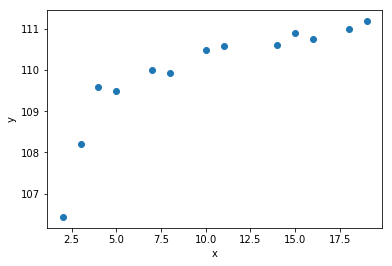

In [137]:
# scatter plot
plt.scatter(data['x'], data['y'])
plt.xlabel("x")
plt.ylabel('y')


In [150]:
# transform 1: 1/y=a+b/x
data['v']=1/data['y']
data['u']=1/data['x']
meanu=data['u'].mean()
meanv=data['v'].mean()
meany=data['y'].mean()
sxy=np.sum((data['u']-meanu)*(data['v']-meanv))
sxx=np.sum((data['u']-meanu)**2)
b=sxy/sxx
a=meanv-meanu*b
data['pred1']=data['x']/(a*data['x']+b)
SST=np.sum((data['y']-meany)**2)
SSE=np.sum((data['y']-data['pred1'])**2)
SSR=SST-SSE
R2=SSR/SST
print("R2: ", R2)
print("{}f+{}f*x".format(a,b))

R2:  0.9729237495756402
0.008966629680572831f+0.0008291743633564367f*x


In [153]:
# transform 1: y=a+b*ln(x)
data['v']=data['y']
data['u']=np.log(data['x'])
meanu=data['u'].mean()
meanv=data['v'].mean()
meany=data['y'].mean()
sxy=np.sum((data['u']-meanu)*(data['v']-meanv))
sxx=np.sum((data['u']-meanu)**2)
b=sxy/sxx
a=meanv-meanu*b
data['pred2']=a+b*data['u']
SST=np.sum((data['y']-meany)**2)
SSE=np.sum((data['y']-data['pred2'])**2)
SSR=SST-SSE
R2=SSR/SST
print("R2: ", R2)
print("{}f+{}f*x".format(a,b))

R2:  0.8773150048965607
106.31467407516661f+1.7139772479275455f*x


## Chp7 Hypothesis testing

In [156]:
# example 7.2.2
x=np.array([239.7, 239.6, 239, 240,239.2])
n=x.shape[0]
meanx=x.mean()
s=np.std(x,ddof=1)
mu0=240
t=(meanx-mu0)*np.sqrt(n)/s
print(t)
if np.abs(t)>stats.t.ppf(0.975,n-1):
    print("reject:", stats.t.ppf(0.975,n-1))
else:
    print("accept:", stats.t.ppf(0.975,n-1)) 

-2.79508497187
reject: 2.7764451052


In [157]:
# eg 7.2.3
a1=np.array([76.43, 76.21, 73.58, 69.69, 65.29, 70.83, 82.75,72.34])
a2=np.array([73.66, 64.27, 69.34, 71.37, 69.77, 68.12, 67.27, 68.07, 62.61])
m=a1.size
n=a2.size
mu1=a1.mean()
mu2=a2.mean()
sw=np.sqrt((np.sum((a1-mu1)**2)+np.sum((a2-mu2)**2))/(m+n-2))
t=(mu1-mu2)/(sw*np.sqrt(1/m+1/n))
if t>stats.t.ppf(0.95, m+n-2):
    print("t statistics is: ", t, " > ", stats.t.ppf(0.95, m+n-2), " reject")
else:
    print("t statistics is: ", t, " <= ", stats.t.ppf(0.95, m+n-2), " could not reject")

t statistics is:  2.4234304245  >  1.75305035569  reject


In [174]:
# 7.2.4 chi-square test for a single variance
n=25
sigma20=0.016
s2=0.025
chisq=(n-1)*s2/sigma20
print(chisq)
print(stats.chi2.ppf(0.95, n-1))

37.50000000000001
36.4150285018


In [181]:
# F-test for two sample variance
a1=np.array([16.2, 16.4, 15.8, 15.5, 16.7, 15.6, 15.8])
a2=np.array([15.9, 16, 16.4, 16.1, 16.5, 15.8, 15.7, 15])
m=a1.size
n=a2.size
s12=np.var(a1,ddof=1)
s22=np.var(a2, ddof=1)
F=s12/s22
print(F)
print("The rejection region is ", stats.f.ppf(0.025, m-1, n-1), stats.f.ppf(0.975, m-1,n-1))

0.908690869087
The rejection region is  0.175578120301 5.11859661338


### 7.3 Hypothesis testing for the parameter theta of the exponential distribution

Suppose x1,...,xn~Exp(1/theta), theta is the mean

nx_=sum(xi)~Ga(n,1/theta0)

chisq=2*n*x_/theta0~chisq(2n)

In [196]:
# H0: mu>=6000 vs H1: MU<6000
a=np.array([395, 4094, 119, 11572, 6133])
n=a.size
CHISQ=2*n*a.mean()/6000
print(CHISQ)
print(stats.chi2.ppf(0.05, 2*n))

7.43766666667
3.94029913612


In [197]:
stats.norm.sf(2.1)

0.017864420562816542

### 7.4 Likelihood test
sum(ni-npi)**2/npi~chisq(k-1)

In [216]:
x=np.array([5,10,20,30,50,100])
p=np.array([0.1,0.2,0.3,0.2,0.1,0.1])
ob=np.array([2,6,6,3,3,0])
expected=20*p
chisq=np.sum((expected-ob)**2/expected)
print(chisq)
print(stats.chi2.ppf(0.95, 6-1))

3.75
11.0704976935


In [218]:
# 7.4.2 The MLE of Poisson distribution is 
mu=(0*57+203+2*383+3*525+4*532+5*408+6*273+7*139+8*45+9*27+10*10+11*6)/2608
mu

3.8696319018404908

In [234]:
import math
n=2608
ni=np.array([57, 203, 383, 525, 532, 408, 273, 139, 45, 27,10,6])
x=np.arange(12)
pi=np.power(mu,x)*np.exp(-mu)/[math.factorial(i) for i in x]
npi=n*pi
chisq=np.sum((ni-npi)**2/npi)
print(chisq)
print(stats.chi2.ppf(0.95, ni.size-1-1))

14.0053276199
18.3070380533


## Chp1 Random events and probability

In [2]:
# A Python program to print all 
# permutations using library function
from itertools import permutations

In [3]:
# Get all permutations of [1, 2, 3]
perm = permutations([1, 2, 3])

In [4]:
# print the list permutations
for i in list(perm):
    print(i)

(1, 2, 3)
(1, 3, 2)
(2, 1, 3)
(2, 3, 1)
(3, 1, 2)
(3, 2, 1)


In [5]:
# get permutations of length 2
perm=permutations([1,2,3],r=2)
for i in list(perm):
    print(i)

(1, 2)
(1, 3)
(2, 1)
(2, 3)
(3, 1)
(3, 2)


In [6]:
# A Python program to print all 
# combinations of given length
from itertools import combinations

In [9]:
# return a list of tuples which contain the combinations
comb=combinations([1,2,3],2)
for i in list(comb):
    print(i)

(1, 2)
(1, 3)
(2, 3)


In [12]:
# Combinations are emitted in lexicographic sort order of input. 
# So, if the input list is sorted, the combination tuples will be produced in sorted order.
comb=combinations([2,1,4],2)
for i in comb:
    print(i)

(2, 1)
(2, 4)
(1, 4)


In [13]:
# elements are treated as unique based on their positions, not values
comb=combinations([1,1,3],2)
for i in list(comb):
    print(i)

(1, 1)
(1, 3)
(1, 3)


In [14]:
# If we want to make combination of same element to same element then we use combinations_with_replacement.
from itertools import combinations_with_replacement
comb=combinations_with_replacement([1,2,3],2)
for i in list(comb):
    print(i)

(1, 1)
(1, 2)
(1, 3)
(2, 2)
(2, 3)
(3, 3)


### Generate random numbers

1. numpy.random.sample(), return [0,1) variables

2. numpy.random.choice(a, size=None, replace=True, p=None) generate a random sample from one-d array

3. numpy.random.randint(low, high=None, size=None, dtype='l'), return an random integar from low(inclusive) to high(exclusive)

4. numpy.random.shuffle(x) modify a sequence in place by shuffling its contents. only shuffle the array along the first axis. For an two-D array, shuffle the columns

5. numpy.random.permutation(x) randomly permute a sequence

In [15]:
# numpy.random.sample()Return random floats in the half-open interval [0.0, 1.0).
a=np.random.sample((2,3,4))

In [19]:
#create uniform sample from [5,7)
b=5+(7-5)*np.random.sample((3,4))
b

array([[ 5.30243388,  5.72453464,  5.36975277,  5.41632911],
       [ 6.3459371 ,  6.71156423,  6.22997128,  6.46970452],
       [ 6.46625165,  5.61649912,  5.75861908,  5.6169927 ]])

In [24]:
c=np.random.choice([1,2,3,4,5], size=(5,8), replace=True, p=[0.2,0.3,0.1,0.4,0])
c

array([[3, 2, 2, 2, 4, 1, 4, 2],
       [2, 1, 1, 2, 1, 2, 1, 2],
       [1, 4, 4, 1, 4, 4, 2, 4],
       [2, 2, 4, 3, 4, 4, 2, 4],
       [1, 1, 4, 2, 2, 1, 2, 2]])

In [25]:
aa_milne_arr = ['pooh', 'rabbit', 'piglet', 'Christopher']
bb=np.random.choice(aa_milne_arr, size=5, p=[0.5,0.1,0.4,0])
bb

array(['piglet', 'pooh', 'pooh', 'piglet', 'pooh'],
      dtype='<U11')

In [26]:
a=np.random.randint(1,5,size=10)
a

array([1, 1, 4, 3, 3, 1, 2, 2, 2, 3])

In [29]:
arr=np.arange(10)
arr
np.random.shuffle(arr)
arr

array([5, 3, 0, 7, 2, 6, 9, 1, 8, 4])

In [30]:
arr=np.arange(9).reshape(3,3)
arr

array([[0, 1, 2],
       [3, 4, 5],
       [6, 7, 8]])

In [32]:
# shuffle the columns for two-D array
np.random.shuffle(arr)
arr

array([[0, 1, 2],
       [6, 7, 8],
       [3, 4, 5]])

In [33]:
np.random.permutation(10)

array([4, 8, 1, 3, 2, 5, 9, 7, 6, 0])

In [34]:
np.random.permutation([1, 4, 9, 12, 15])

array([12,  9, 15,  1,  4])

In [38]:
# permutate the columns
arr = np.arange(9).reshape((3, 3))
arr

array([[0, 1, 2],
       [3, 4, 5],
       [6, 7, 8]])

In [39]:
np.random.permutation(arr)

array([[0, 1, 2],
       [6, 7, 8],
       [3, 4, 5]])

In [41]:
135*0.15

20.25

## scipy.stats statistical functions

scipy.stats.chi2: a chi-squared continuous random variable. 


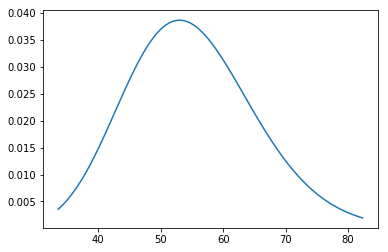

In [44]:
from scipy.stats import chi2
import matplotlib.pyplot as plt
fig, ax = plt.subplots(1, 1)
df=55
mean, var, skew, kurt=chi2.stats(df,moments='mvsk')
x=np.linspace(chi2.ppf(0.01,df), chi2.ppf(0.99,df),100)
y=chi2.pdf(x,df)
ax.plot(x,y)

In [49]:
# generate random variables
r=chi2.rvs(df,size=1000)
ax.hist(r, normed=True, histtype='stepfilled', alpha=0.2)
ax.legend(loc='best', frameon=False)
plt.show()

C:\Users\jzhang11\AppData\Local\Continuum\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:545: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


In [54]:
r=chi2.rvs(df, loc=0, scale=1, size=1, random_state=None)
type(r)

numpy.ndarray

In [55]:
# probility density function
chi2.pdf(5, df=4, loc=0, scale=1)

0.10260624827987348

In [56]:
# log of the probability density function at the given point x
x=5
df=10
chi2.logpdf(x, df, loc=0, scale=1)

-2.7060380834112712

In [58]:
#cumulative function
stats.norm.cdf(1.96)

0.97500210485177952

In [59]:
stats.norm.logcdf(1.96)

-0.025315649164282163

In [62]:
stats.norm.sf(1.96)

0.024997895148220435

In [63]:
# percent point function, inverse of cdf
stats.norm.ppf(0.025)

-1.9599639845400545

In [65]:
stats.norm.interval(0.95)

(-1.959963984540054, 1.959963984540054)

1. stats.beta(a,b)

scale is the mean

2. stats.expon(

A common parameterization for expon is in terms of the rate parameter lambda, such that pdf = lambda * exp(-lambda * x). This parameterization corresponds to using scale = 1 / lambda=mean.


3. scipy.stats.gamma

4. scipy.stats.lognorm

5. scipy.stats.norm

6. scipy.stats.multivariate_normal

7.scipy.stats.bernoulli

8.scipy.stats.binom()

9. scipy.stats.genom()

10. scipy.stats.poisson()


In [75]:
import scipy.stats
r = stats.beta.rvs(2, 3, size=1000)
lamb=3
scale=1/lamb
r=stats.expon.rvs(scale,5)
r

5.1213074895135762

In [77]:
stats.chi2.ppf(0.9,5)

9.2363568997811214